In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# DATA POINTS FOR 5 m/s

In [90]:
files = ['PythonFiles/Sensor_Rotor_5ms.txt','PythonFiles/Sensor_Rotor_9ms.txt','PythonFiles/Sensor_Rotor_11ms.txt','PythonFiles/Sensor_Rotor_20ms.txt']
speeds = ['5 m/s', '9 m/s', '11 m/s' , '20 m/s']

THESE ARE THE VALUES FOR 5 m/s
The Power coefficient obtained with Ashes equals 46.48
The Thrust coefficient obtained with Ashes equals 83.26
The power obtained with Ashes equals 887.21
The thrust  obtained with Ashes equals 317.84
  
THESE ARE THE VALUES FOR 9 m/s
The Power coefficient obtained with Ashes equals 46.48
The Thrust coefficient obtained with Ashes equals 83.26
The power obtained with Ashes equals 5174.22
The thrust  obtained with Ashes equals 1029.82
  
THESE ARE THE VALUES FOR 11 m/s
The Power coefficient obtained with Ashes equals 46.48
The Thrust coefficient obtained with Ashes equals 83.25
The power obtained with Ashes equals 9447.02
The thrust  obtained with Ashes equals 1538.32
  
THESE ARE THE VALUES FOR 20 m/s
The Power coefficient obtained with Ashes equals 8.77
The Thrust coefficient obtained with Ashes equals 11.07
The power obtained with Ashes equals 10715.90
The thrust  obtained with Ashes equals 675.94
  


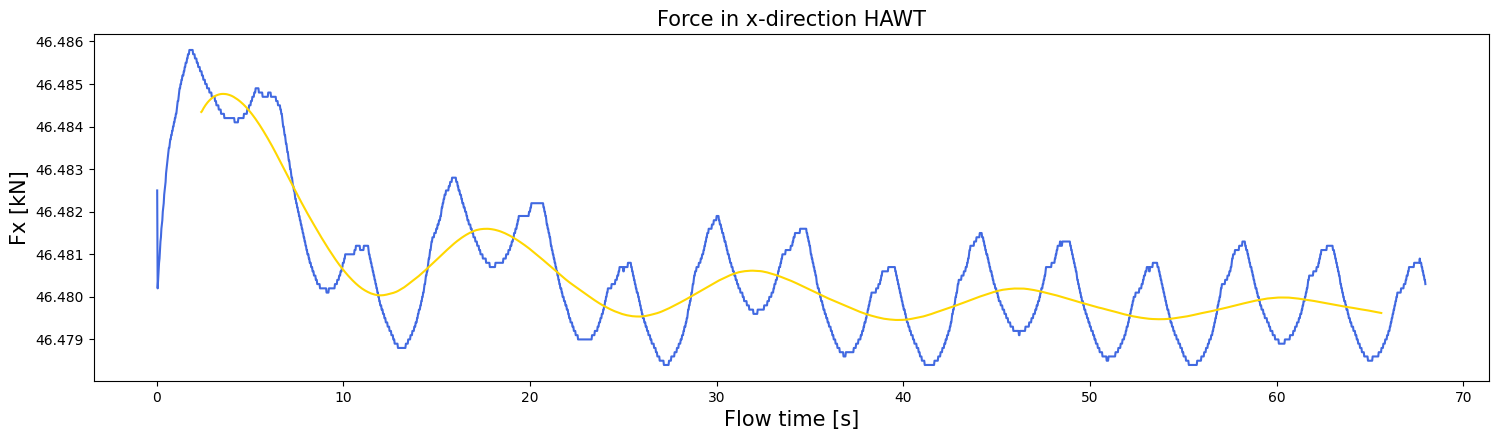

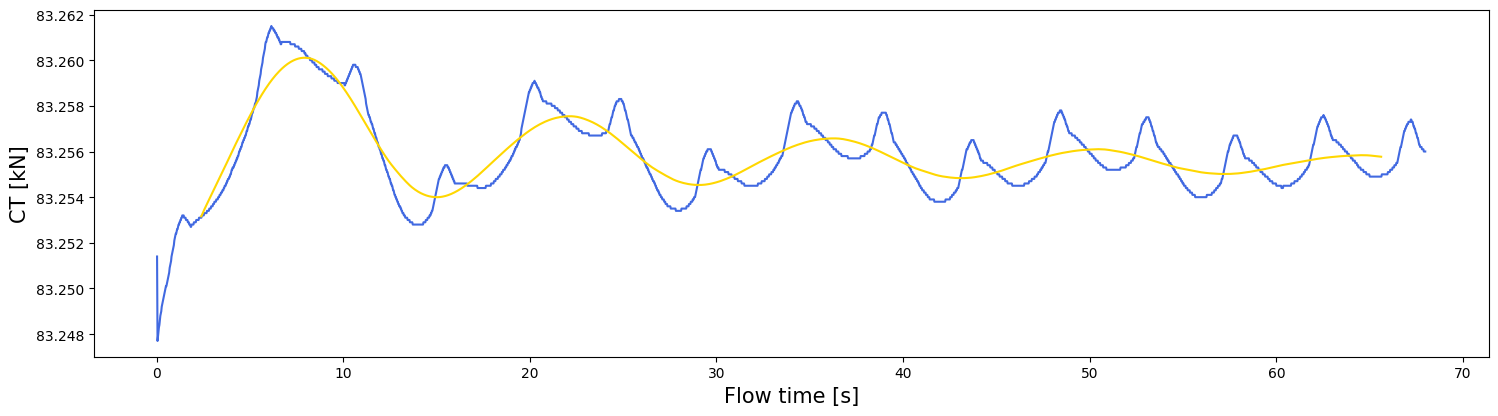

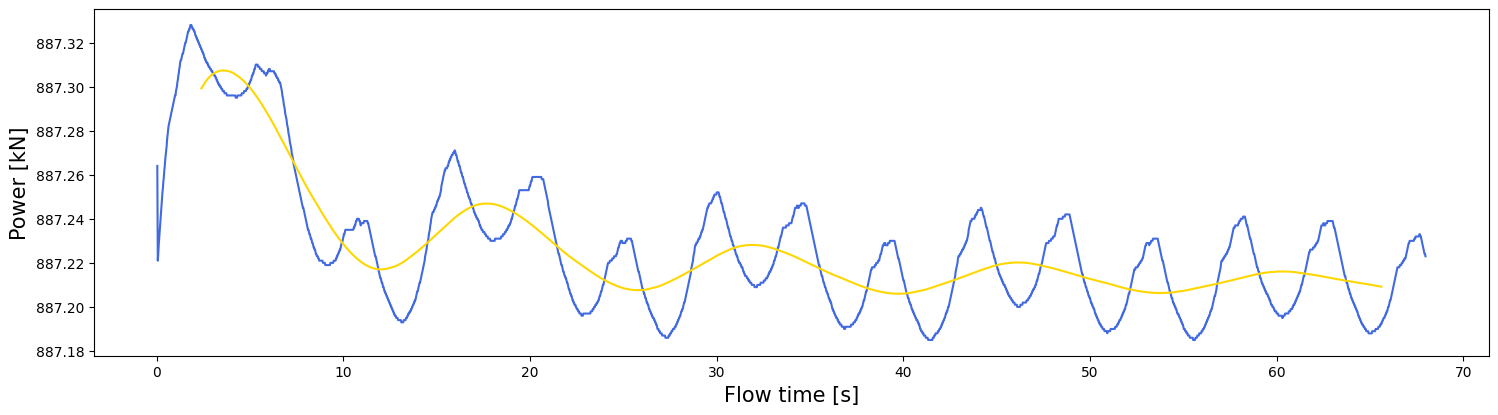

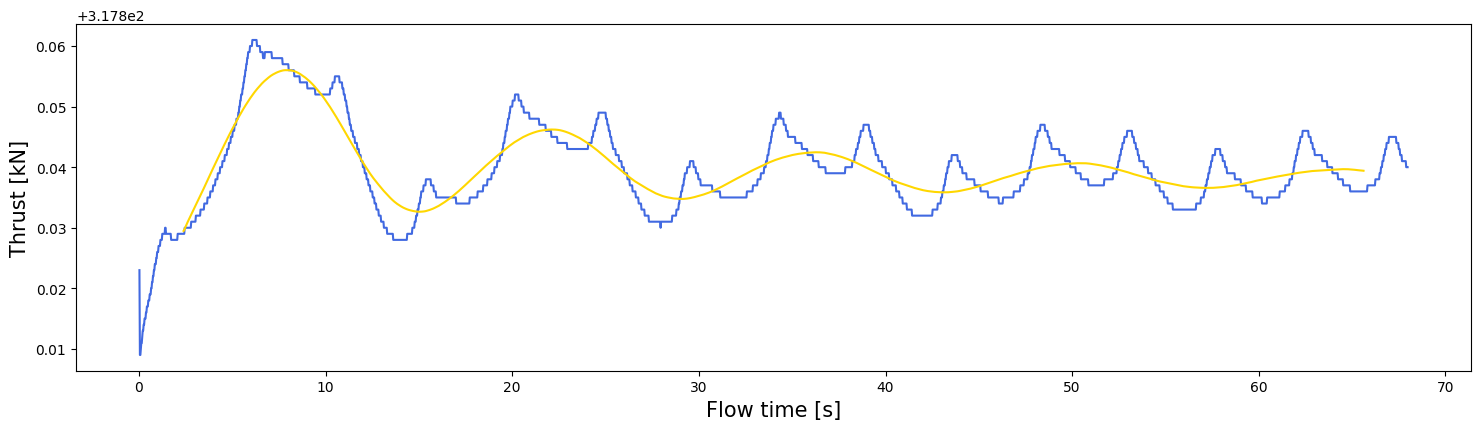

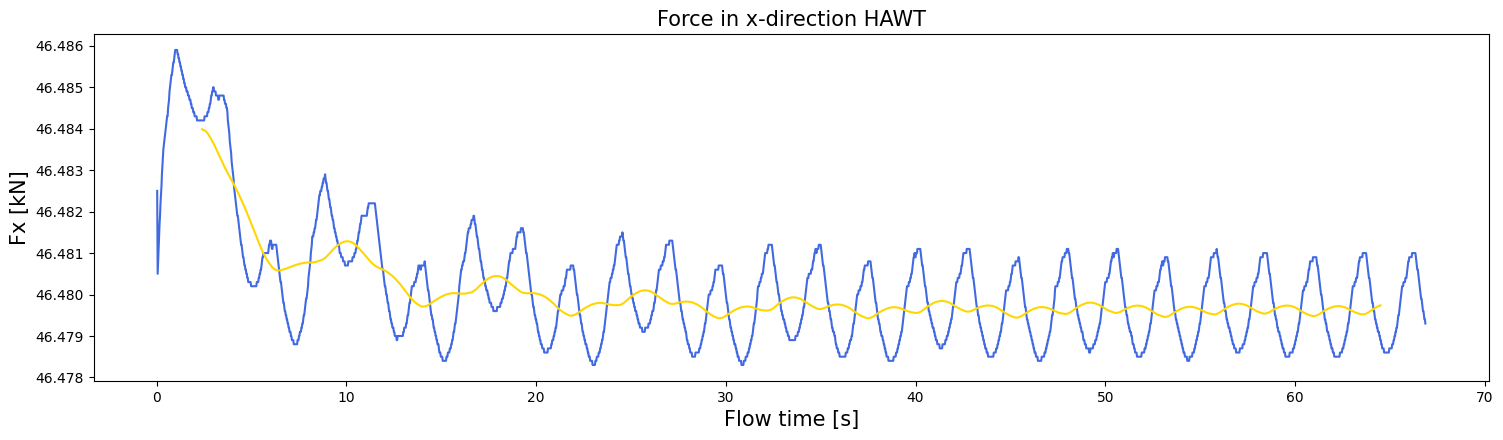

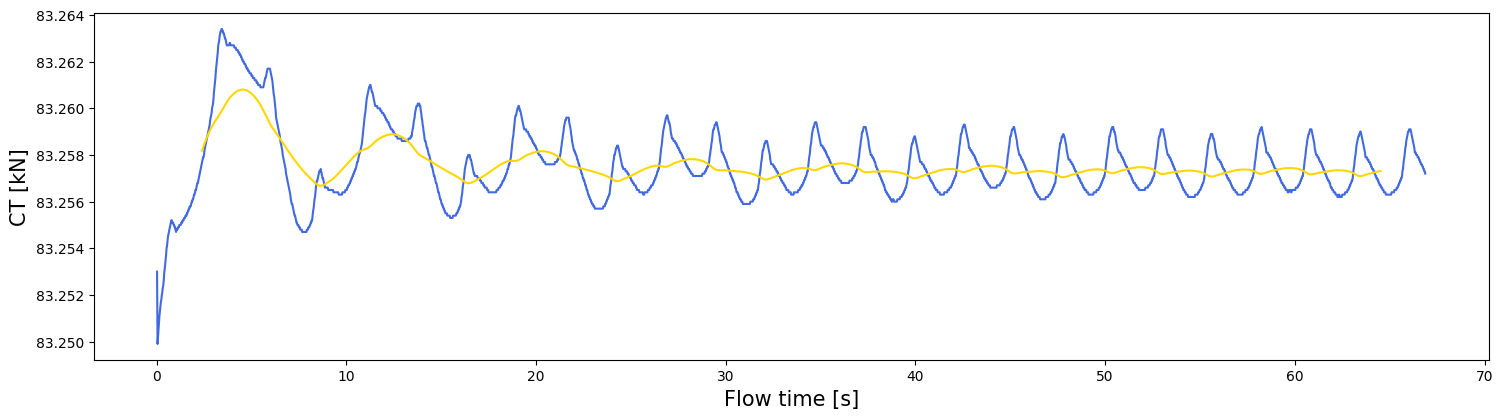

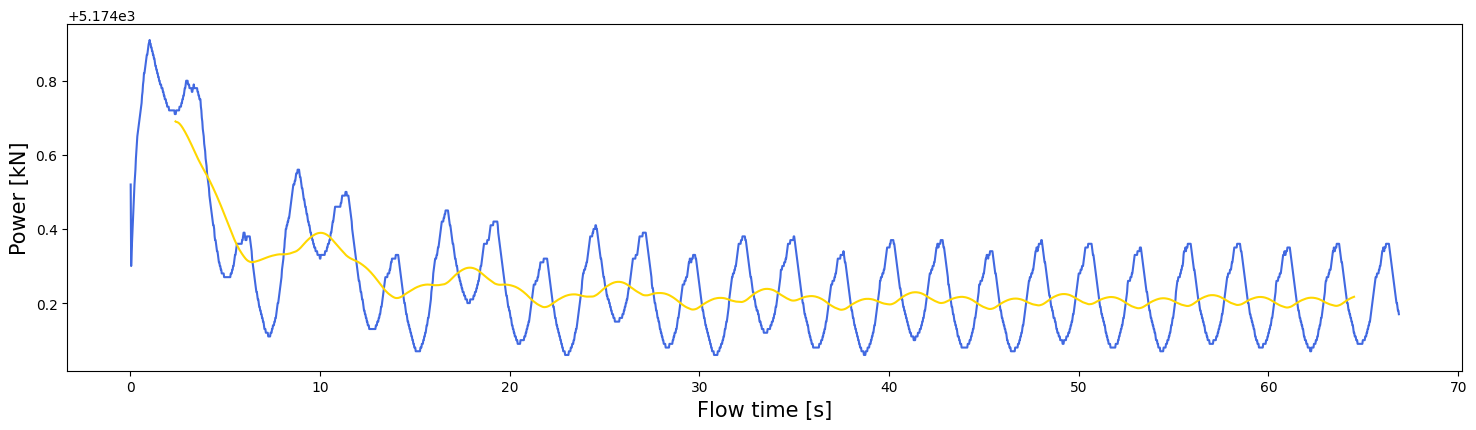

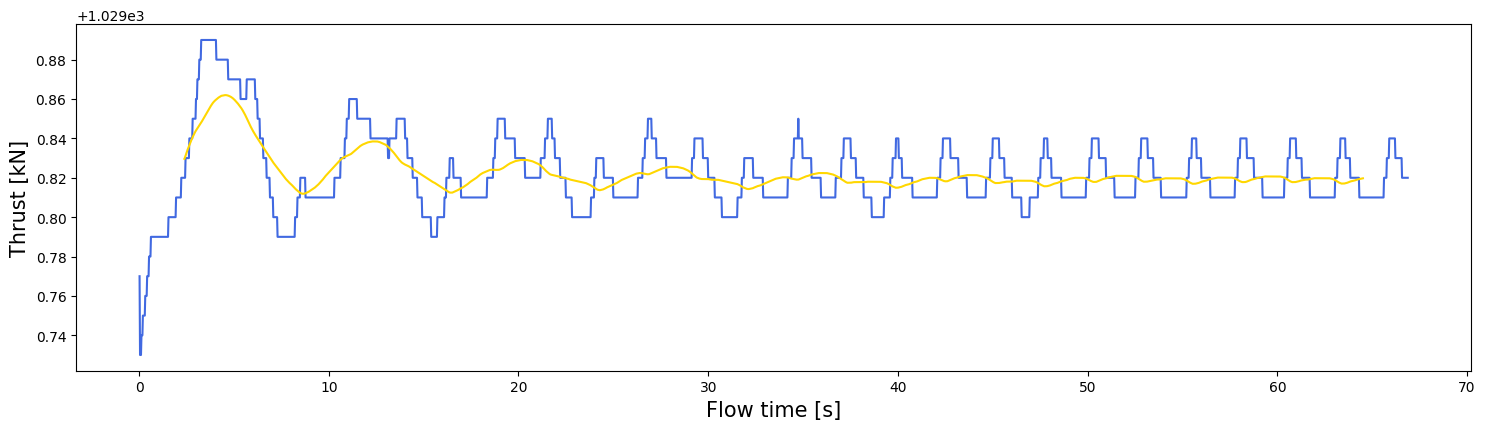

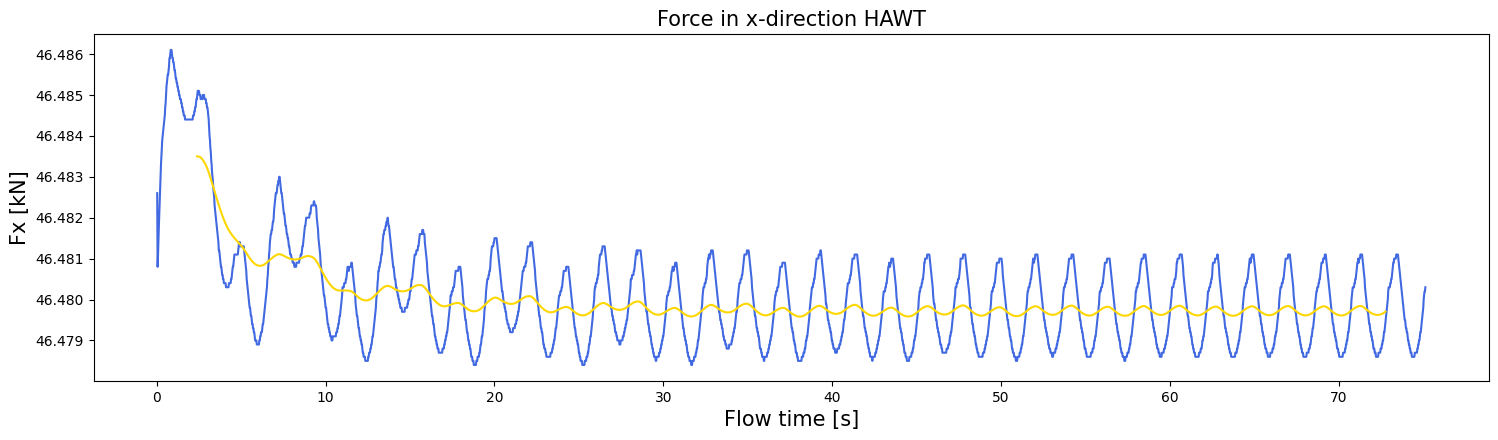

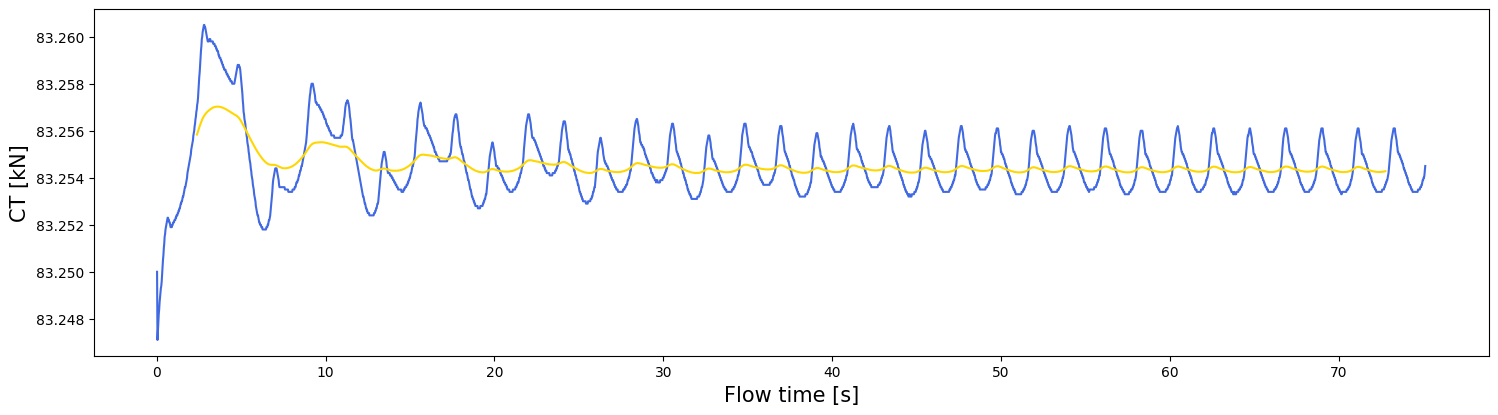

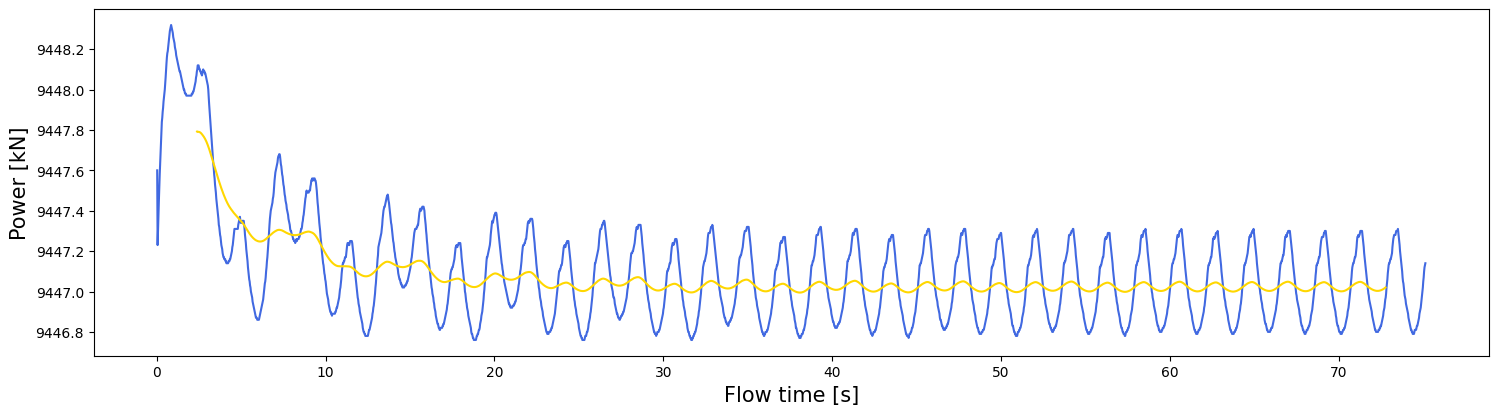

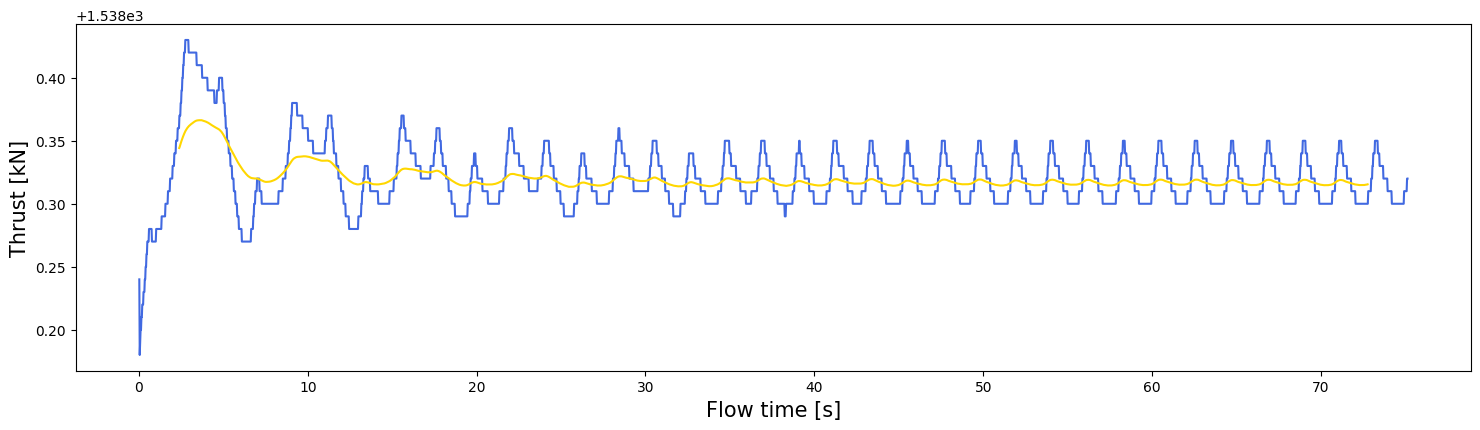

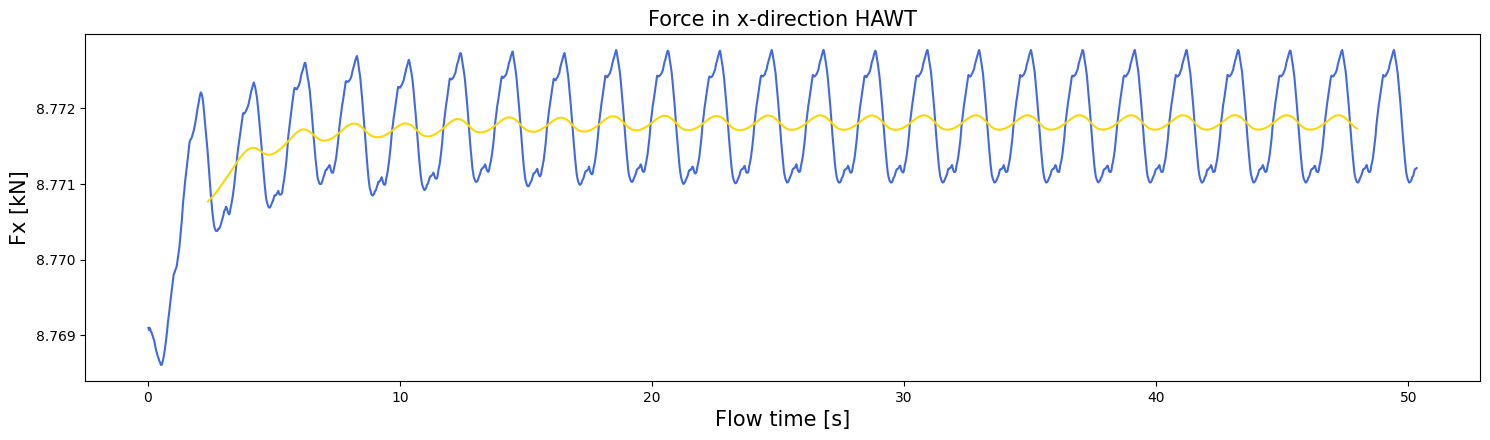

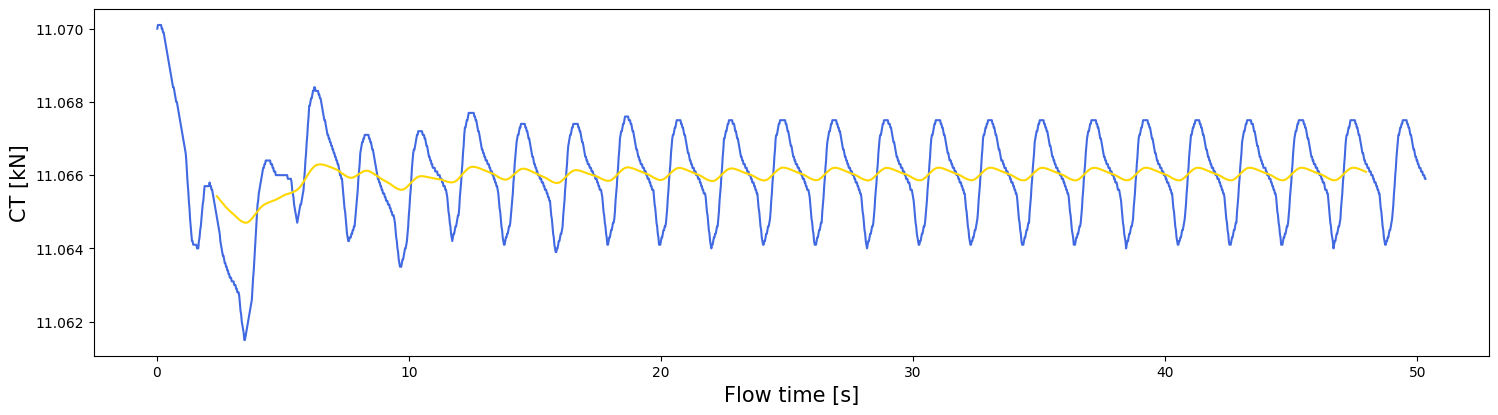

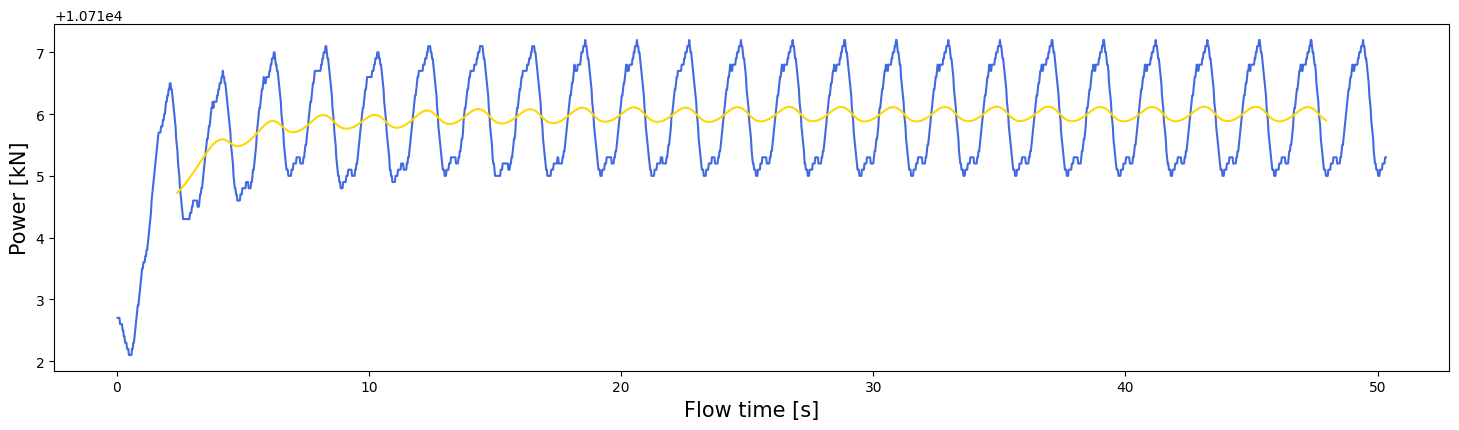

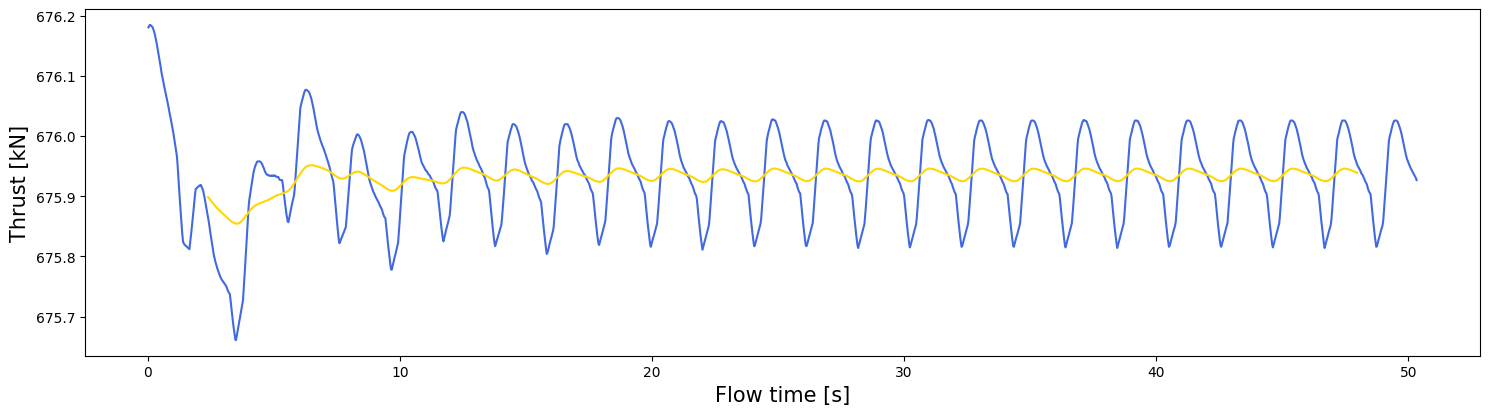

In [92]:
for i in range(len(files)):
    df = pd.read_csv(files[i], sep='\t')
    #data of sprogo file
    time = df.values[:,0] 
    Power = df.values[:,1]
    Torque = df.values[:,2]
    Thrust = df.values[:,3]
    CP = df.values[:,7]
    CT = df.values[:,8]

    window_size = 190
    # Convert array of integers to pandas series
    numbers_series1 = pd.Series(CP)
    numbers_series2 = pd.Series(CT)
    numbers_series3 = pd.Series(Power)
    numbers_series4 = pd.Series(Thrust)
    numbers_series5 = pd.Series(time)

    # Get the window of series
    # of observations of specified window size
    windows1 = numbers_series1.rolling(window_size)
    windows2 = numbers_series2.rolling(window_size)
    windows3 = numbers_series3.rolling(window_size)
    windows4 = numbers_series4.rolling(window_size)
    windows5 = numbers_series5.rolling(window_size)


    # Create a series of moving
    # averages of each window
    moving_averages1 = windows1.mean()
    moving_averages2 = windows2.mean()
    moving_averages3 = windows3.mean()
    moving_averages4 = windows4.mean()
    moving_averages5 = windows5.mean()

    # Convert pandas series back to list
    moving_averages_list1 = moving_averages1.tolist()
    moving_averages_list2 = moving_averages2.tolist()
    moving_averages_list3 = moving_averages3.tolist()
    moving_averages_list4 = moving_averages4.tolist()
    moving_averages_list5 = moving_averages5.tolist()

    # Remove null entries from the list
    CP_new = np.array(moving_averages_list1[window_size - 1:])
    CT_new = np.array(moving_averages_list2[window_size - 1:])
    Power_new = np.array(moving_averages_list3[window_size - 1:])
    Thrust_new = np.array(moving_averages_list4[window_size - 1:])
    time_new = np.array(moving_averages_list5[window_size - 1:])

    print('THESE ARE THE VALUES FOR {}'.format(speeds[i]))
    plt.figure(figsize=(18, 4.5))
    plt.plot(time,CP, color = 'royalblue')
    plt.plot(time_new,CP_new, color = 'gold')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlim()
    plt.ylim()
    plt.xlabel('Flow time [s]',fontsize = 15)
    plt.ylabel('Fx [kN]',fontsize = 15)
    plt.title('Force in x-direction HAWT',fontsize = 15)
    plt.savefig('CP')
    plt.xlim()
    #plt.show()
    print('The Power coefficient obtained with Ashes equals {:.2f}'.format(CP_new[-1]))

    plt.figure(figsize=(18, 4.5))
    plt.plot(time,CT, color = 'royalblue')
    plt.plot(time_new,CT_new, color = 'gold')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlim()
    plt.ylim()
    plt.xlabel('Flow time [s]',fontsize = 15)
    plt.ylabel('CT [kN]',fontsize = 15)
    plt.title('',fontsize = 15)
    plt.savefig('CT')
    plt.xlim()
    # plt.show()
    print('The Thrust coefficient obtained with Ashes equals {:.2f}'.format(CT_new[-1]))

    plt.figure(figsize=(18, 4.5))
    plt.plot(time,Power, color = 'royalblue')
    plt.plot(time_new,Power_new, color = 'gold')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlim()
    plt.ylim()
    plt.xlabel('Flow time [s]',fontsize = 15)
    plt.ylabel('Power [kN]',fontsize = 15)
    plt.title('',fontsize = 15)
    plt.savefig('Power')
    plt.xlim()
    # plt.show()
    print('The power obtained with Ashes equals {:.2f}'.format(Power_new[-1]))

    plt.figure(figsize=(18, 4.5))
    plt.plot(time,Thrust, color = 'royalblue')
    plt.plot(time_new,Thrust_new, color = 'gold')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlim()
    plt.ylim()
    plt.xlabel('Flow time [s]',fontsize = 15)
    plt.ylabel('Thrust [kN]',fontsize = 15)
    plt.title('',fontsize = 15)
    plt.savefig('Thrust')
    plt.xlim()
    # plt.show()
    print('The thrust  obtained with Ashes equals {:.2f}'.format(Thrust_new[-1]))
    print('  ')